# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 613


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=imperial"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | nangong
Processing Record 2 of Set 1 | mataura
Processing Record 3 of Set 1 | onega
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | rikitea
Processing Record 6 of Set 1 | raymond
Processing Record 7 of Set 1 | cayenne
Processing Record 8 of Set 1 | maceio
Processing Record 9 of Set 1 | upernavik
Processing Record 10 of Set 1 | kapaa
Processing Record 11 of Set 1 | umzimvubu
City not found. Skipping...
Processing Record 12 of Set 1 | rosa zarate
Processing Record 13 of Set 1 | sitka
Processing Record 14 of Set 1 | cidreira
Processing Record 15 of Set 1 | hilo
Processing Record 16 of Set 1 | chuy
Processing Record 17 of Set 1 | matelandia
Processing Record 18 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 19 of Set 1 | diego de almagro
Processing Record 20 of Set 1 | albany
Processing Record 21 of Set 1 | cherskiy
Processing Record 22 of Set 1 | hobart


Processing Record 39 of Set 4 | iqaluit
Processing Record 40 of Set 4 | ribeira grande
Processing Record 41 of Set 4 | yarmouth
Processing Record 42 of Set 4 | tual
Processing Record 43 of Set 4 | houma
Processing Record 44 of Set 4 | tanout
Processing Record 45 of Set 4 | bandarbeyla
Processing Record 46 of Set 4 | bayan
Processing Record 47 of Set 4 | qaanaaq
Processing Record 48 of Set 4 | victoria
Processing Record 49 of Set 4 | saint-pierre
Processing Record 0 of Set 5 | longyearbyen
Processing Record 1 of Set 5 | ocampo
Processing Record 2 of Set 5 | arambagh
Processing Record 3 of Set 5 | santa eulalia del rio
City not found. Skipping...
Processing Record 4 of Set 5 | mawlaik
Processing Record 5 of Set 5 | palabuhanratu
City not found. Skipping...
Processing Record 6 of Set 5 | kasongo-lunda
Processing Record 7 of Set 5 | mednogorsk
Processing Record 8 of Set 5 | morondava
Processing Record 9 of Set 5 | moree
Processing Record 10 of Set 5 | yeppoon
Processing Record 11 of Set 5 

Processing Record 32 of Set 8 | bubaque
Processing Record 33 of Set 8 | marsh harbour
Processing Record 34 of Set 8 | shumerlya
Processing Record 35 of Set 8 | chumikan
Processing Record 36 of Set 8 | vredendal
Processing Record 37 of Set 8 | sayyan
Processing Record 38 of Set 8 | mandalgovi
Processing Record 39 of Set 8 | kudahuvadhoo
Processing Record 40 of Set 8 | kazalinsk
City not found. Skipping...
Processing Record 41 of Set 8 | chernyshevskiy
Processing Record 42 of Set 8 | abu kamal
Processing Record 43 of Set 8 | hornepayne
Processing Record 44 of Set 8 | trikerion
City not found. Skipping...
Processing Record 45 of Set 8 | kutum
Processing Record 46 of Set 8 | redding
Processing Record 47 of Set 8 | ocos
Processing Record 48 of Set 8 | helong
Processing Record 49 of Set 8 | souillac
Processing Record 0 of Set 9 | qunduz
Processing Record 1 of Set 9 | shadegan
Processing Record 2 of Set 9 | almansa
Processing Record 3 of Set 9 | halalo
City not found. Skipping...
Processing R

Processing Record 20 of Set 12 | makaleng
Processing Record 21 of Set 12 | krasnoarmeysk
Processing Record 22 of Set 12 | hailin
Processing Record 23 of Set 12 | maracacume
Processing Record 24 of Set 12 | nador
Processing Record 25 of Set 12 | roald
Processing Record 26 of Set 12 | istok
Processing Record 27 of Set 12 | gerash
Processing Record 28 of Set 12 | meulaboh
Processing Record 29 of Set 12 | cabedelo
Processing Record 30 of Set 12 | phan thiet
Processing Record 31 of Set 12 | birjand
Processing Record 32 of Set 12 | ampanihy
Processing Record 33 of Set 12 | abadan
Processing Record 34 of Set 12 | sao joao da barra
Processing Record 35 of Set 12 | ola
Processing Record 36 of Set 12 | sao francisco
Processing Record 37 of Set 12 | loikaw
Processing Record 38 of Set 12 | vaitape
Processing Record 39 of Set 12 | gien
Processing Record 40 of Set 12 | amahai
Processing Record 41 of Set 12 | monrovia
Processing Record 42 of Set 12 | the pas
Processing Record 43 of Set 12 | fevralsk


In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          572
Lat           572
Lng           572
Max Temp      572
Humidity      572
Cloudiness    572
Wind Speed    572
Country       572
Date          572
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,nangong,37.3581,115.3744,36.19,51,13,2.57,CN,1676336040
1,mataura,-46.1927,168.8643,77.52,28,0,4.38,NZ,1676335842
2,onega,63.9061,38.1404,28.35,91,100,17.36,RU,1676336040
3,ushuaia,-54.8000,-68.3000,40.66,87,100,10.36,AR,1676335793
4,rikitea,-23.1203,-134.9692,79.45,68,100,5.77,PF,1676335767


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,nangong,37.3581,115.3744,36.19,51,13,2.57,CN,1676336040
1,mataura,-46.1927,168.8643,77.52,28,0,4.38,NZ,1676335842
2,onega,63.9061,38.1404,28.35,91,100,17.36,RU,1676336040
3,ushuaia,-54.8000,-68.3000,40.66,87,100,10.36,AR,1676335793
4,rikitea,-23.1203,-134.9692,79.45,68,100,5.77,PF,1676335767


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

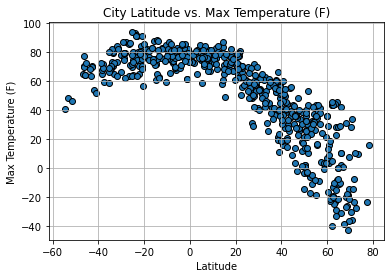

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (F)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

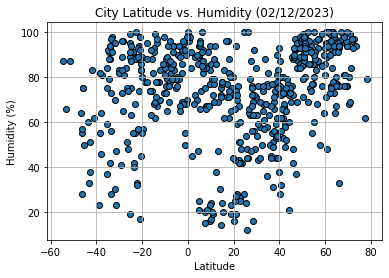

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (02/12/2023)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

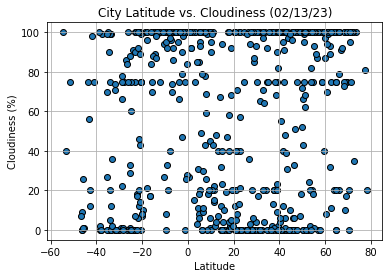

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

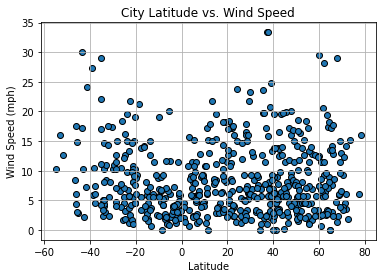

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots

def plot_linear_regression(x, y, title, xlabel, ylabel, text_coordinates):
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    regression = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x, regression, "red")
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    print(f"The r-value is: {r_value}")
    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,nangong,37.3581,115.3744,36.19,51,13,2.57,CN,1676336040
2,onega,63.9061,38.1404,28.35,91,100,17.36,RU,1676336040
5,raymond,43.9015,-70.4703,34.72,75,100,2.57,US,1676336041
6,cayenne,4.9333,-52.3333,75.24,94,100,2.30,GF,1676335881
8,upernavik,72.7868,-56.1549,-27.81,97,35,1.79,GL,1676335555


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,mataura,-46.1927,168.8643,77.52,28,0,4.38,NZ,1676335842
3,ushuaia,-54.8000,-68.3000,40.66,87,100,10.36,AR,1676335793
4,rikitea,-23.1203,-134.9692,79.45,68,100,5.77,PF,1676335767
7,maceio,-9.6658,-35.7353,76.44,88,0,5.75,BR,1676336041
12,cidreira,-30.1811,-50.2056,77.76,83,0,17.43,BR,1676335861


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.864204908738266


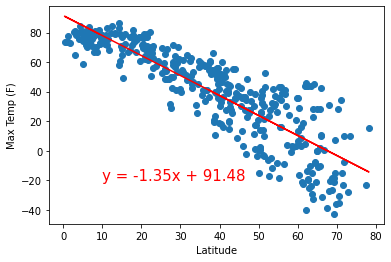

In [15]:
# Linear regression on Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Max Temp"]
plot_linear_regression(x, y, "", "Latitude", "Max Temp (F)",(10,-20))


The r-value is: 0.3876956668325025


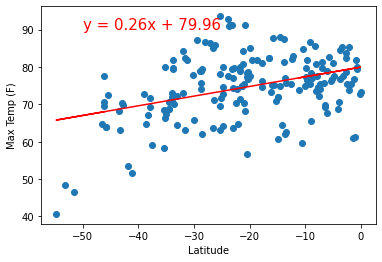

In [16]:
# Linear regression on Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Max Temp']

plot_linear_regression(x, y, "",'Latitude', 'Max Temp (F)',(-50,90))

**Discussion about the linear relationship:** The linear regression line explains more than 80% of the relationships between Max Temp and Latitude in Northern Hemisphere so Max Temp can be forecasted by Latitude but it is not as clear in Southern Hemisphere

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.37047400033187733


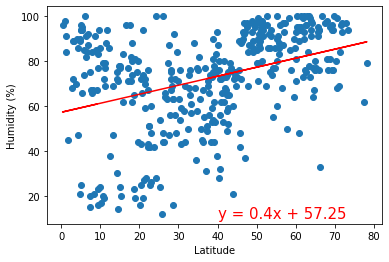

In [17]:
# Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Humidity']

plot_linear_regression(x, y, "", 'Latitude', 'Humidity (%)',(40,10))


The r-value is: 0.31671989284219937


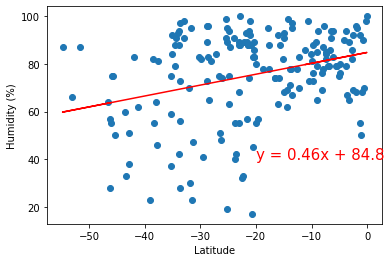

In [18]:
# Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Humidity']

plot_linear_regression(x, y, "", 'Latitude', 'Humidity (%)',(-20,40))


**Discussion about the linear relationship:** There is a positive linear relationship in both hemispheres but with a low proportion of explanation in the variables

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.27049291846806417


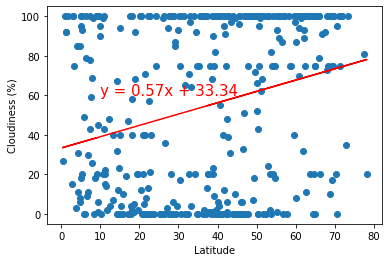

In [19]:
# Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Cloudiness']

plot_linear_regression(x, y, "",'Latitude','Cloudiness (%)',(10,60))


The r-value is: 0.4436890964982869


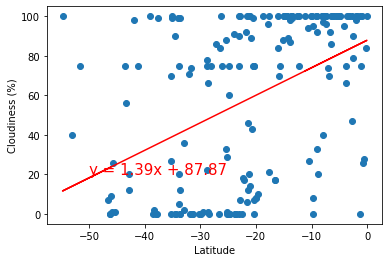

In [20]:
# Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Cloudiness']

plot_linear_regression(x, y, "",'Latitude','Cloudiness (%)',(-50,20))


**Discussion about the linear relationship:** There is a positive linear relationship in both hemispheres but with a low proportion of explanation in the variables

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.05654088718934975


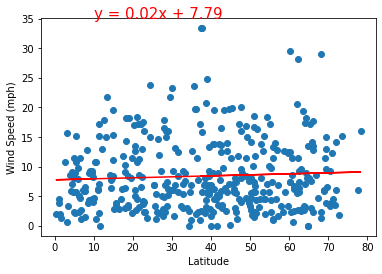

In [21]:
# Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Wind Speed']

plot_linear_regression(x, y, "",'Latitude', 'Wind Speed (mph)',(10,35))


The r-value is: -0.37015873822145057


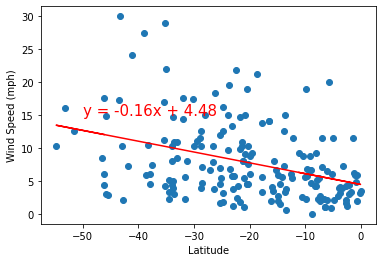

In [22]:
# Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Wind Speed']

plot_linear_regression(x, y, "",'Latitude', 'Wind Speed (mph)',(-50,15))


**Discussion about the linear relationship:** There is a very low level of explanation of these variables in Northern hemisphere, it is higher in Southern Hemisphere but still under 50-60% that may be an acceptable level.